# Objetivo

En este trabajo vamos a analizar los datos epidemiológicos generados por el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data). Siguiendo los procesos estándares descargaremos los datos desde gitub, analizaremos los campos y prepararemos una serie de gráficas que añadan aunque sea un poco de información a lo que está ocurriendo.

In [29]:
"""
@author: Manuel H. Arias 
@Twitter: @walyt
@mail: mharias@me.com
"""

'\n@author: Manuel H. Arias \n@Twitter: @walyt\n@mail: mharias@me.com\n'

## Importación de librerias estándares para DAE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import numpy as np
from datetime import datetime
import seaborn as sns
%matplotlib inline

import urllib.request

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [2]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla

In [3]:
#url de este notebook en github
github_url = 'https://github.com/mharias/covid/blob/master/graficos_escovid19data.ipynb'

In [4]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

In [5]:
#url de la fuente de datos
path_montera34='https://github.com/montera34/escovid19data/blob/master/data/output/covid19-provincias-spain_consolidated.csv?raw=true'

Leemos los datos en un `pandas`

In [6]:
df = pd.read_csv(path_montera34)

veamos una rápida descripción de la información:

In [7]:
df.describe()

,ine_code,new_cases,PCR,TestAc,activos,hospitalized,intensive_care,deceased,cases_accumulated,cases_accumulated_PCR,...,cases_PCR_7days,daily_cases,daily_cases_avg7,daily_cases_PCR,daily_cases_PCR_avg7,daily_deaths,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,deaths_last_week
count,10976.000000,3448.000000,2609.000000,795.000000,1178.000000,7228.000000,7091.000000,8146.000000,5476.000000,5988.000000,...,5532.000000,5341.000000,4768.000000,6319.000000,5955.000000,7901.000000,7508.0,7465.000000,7782.000000,6862.000000
mean,26.508473,45.352378,68.991184,2740.216352,862.674024,188.204068,25.143985,552.816720,4100.245800,5801.038911,...,349.551699,66.024902,68.205055,56.268080,55.193535,4.493862,inf,4.715137,4.536996,35.498397
std,15.004276,130.257658,174.344736,11994.265907,1338.847708,886.916869,101.087027,1741.773947,10858.550612,14282.706994,...,1213.718710,197.692201,190.329426,208.330386,194.352540,23.436413,NaN,23.845373,23.144002,172.140636
min,1.000000,-67.000000,-67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-107.000000,-106.000000,-11.700000,-97.000000,-12.700000,-22.000000,-30.8,-1.300000,-0.600000,-4.000000
25%,14.000000,2.000000,3.000000,4.000000,134.000000,7.000000,1.000000,63.000000,525.750000,1290.000000,...,10.000000,3.000000,5.000000,1.000000,1.700000,0.000000,0.0,0.000000,0.000000,0.000000
50%,27.000000,13.500000,13.000000,22.000000,390.000000,29.000000,4.000000,172.000000,1685.500000,2313.500000,...,37.000000,17.000000,22.650000,6.000000,6.000000,0.000000,0.0,0.300000,0.400000,3.000000
75%,40.000000,45.000000,54.000000,376.500000,1093.500000,109.000000,17.000000,348.750000,3186.000000,4063.000000,...,199.000000,57.000000,58.300000,30.000000,30.900000,2.000000,1.3,2.300000,2.400000,20.000000
max,52.000000,1992.000000,2030.000000,64841.000000,10275.000000,15227.000000,1528.000000,11341.000000,92072.000000,122394.000000,...,16240.000000,3374.000000,2491.400000,3475.000000,2564.300000,377.000000,inf,350.700000,339.000000,2373.000000


y un muestreo de valores y de algunas columnas de interés:

In [8]:
df.head()

,date,province,ine_code,ccaa,new_cases,PCR,TestAc,activos,hospitalized,intensive_care,...,daily_cases_PCR,daily_cases_PCR_avg7,daily_deaths,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,deaths_last_week,source_name,source,comments
0,2020-01-31,Albacete,2,Castilla - La Mancha,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
1,2020-01-31,Alicante/Alacant,3,Comunitat Valenciana,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
2,2020-01-31,Almería,4,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
3,2020-01-31,Araba/Álava,1,País Vasco,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
4,2020-01-31,Asturias,33,"Asturias, Principado de",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN


In [9]:
df['province'].unique()

array(['Albacete', 'Alicante/Alacant', 'Almería', 'Araba/Álava',
       'Asturias', 'Ávila', 'Badajoz', 'Balears, Illes', 'Barcelona',
       'Bizkaia', 'Burgos', 'Cáceres', 'Cádiz', 'Cantabria',
       'Castellón/Castelló', 'Ceuta', 'Ciudad Real', 'Córdoba',
       'Coruña, A', 'Cuenca', 'Gipuzkoa', 'Girona', 'Granada',
       'Guadalajara', 'Huelva', 'Huesca', 'Jaén', 'León', 'Lleida',
       'Lugo', 'Madrid', 'Málaga', 'Melilla', 'Murcia', 'Navarra',
       'Ourense', 'Palencia', 'Palmas, Las', 'Pontevedra', 'Rioja, La',
       'Salamanca', 'Santa Cruz de Tenerife', 'Segovia', 'Sevilla',
       'Soria', 'Tarragona', 'Teruel', 'Toledo', 'Valencia/València',
       'Valladolid', 'Zamora', 'Zaragoza'], dtype=object)

Vamos a formatear correctamente la columna `Date`, para posteriormente ordenar el $pandas$ por fecha creciente:

In [10]:
df['date']=pd.to_datetime(df['date'])

In [11]:
df.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'intensive_care', 'deceased',
       'cases_accumulated', 'cases_accumulated_PCR', 'recovered', 'num_casos',
       'num_casos_prueba_pcr', 'num_casos_prueba_test_ac',
       'num_casos_prueba_otras', 'num_casos_prueba_desconocida', 'poblacion',
       'cases_per_cienmil', 'intensive_care_per_1000000',
       'deceassed_per_100000', 'hospitalized_per_100000', 'cases_14days',
       'cases_7days', 'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_inc', 'daily_deaths_avg3',
       'daily_deaths_avg7', 'deaths_last_week', 'source_name', 'source',
       'comments'],
      dtype='object')

# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

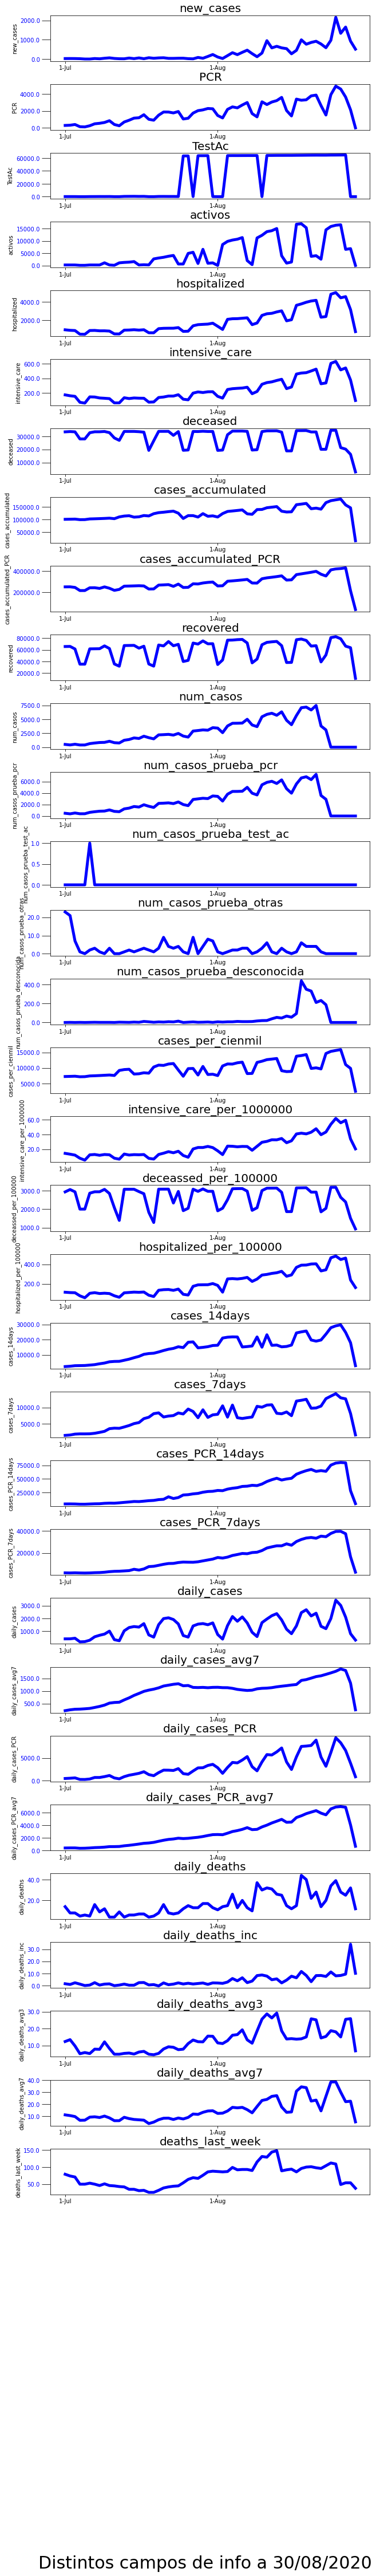

In [12]:
#un par de funciones para formatear

def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.1f}'.format(value)
    
#preparamos los  datos: eliminamos las columnas no numéricas al no poderse representar gráficamente
#generamos un pandas 'datos'que habremos filtrado desde la fecha de los datos que queremos representrar

a_borrar=['date','poblacion','province','ine_code','ccaa','source_name','source','comments']
claves=list(df.columns)
for i in a_borrar:
    claves.remove(i) 

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
    
    
#vamos a generar un gráfico matplotlib en al que añadiremos cada una de las columnas
f = plt.figure(figsize=(10,70))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Distintos campos de info a '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)

#sns.set_style("whitegrid")
#sns.set_palette(sns.color_palette("RdBu_r",19))

#iteramos sobre la lista de columnas y las añadimos como un eje adicional
for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    
    data1=datos.pivot_table(index=['date'],values=[clave],aggfunc=np.sum)
    
    axe.set_title(clave,size=20)
    sns.lineplot(data1.index, data1[clave], ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.xaxis.set_major_locator(DayLocator([1]))

    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    axe.set_xlabel('')
    
#f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafic

Una vez analizadas cada una de las columnas de datos podremos elegir las que queremos presentar..

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

<Figure size 432x288 with 0 Axes>

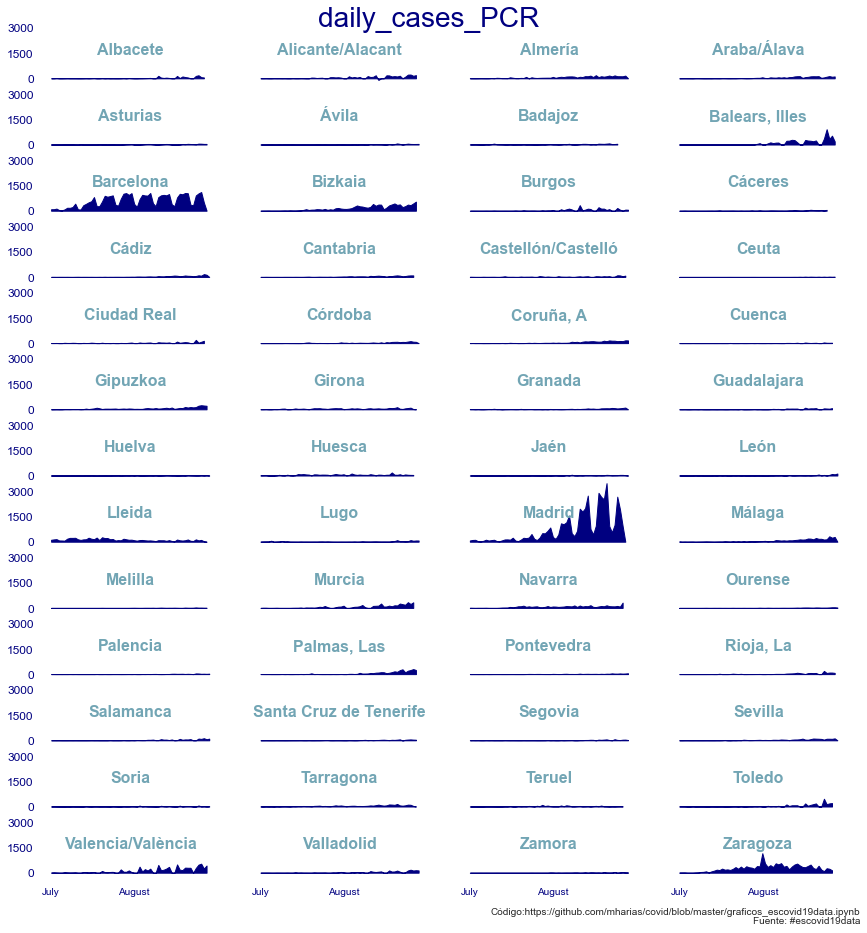

In [13]:
sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


# Preparamos los datos. Es importante añadir un zero a los campos NotANumber..

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
#datos = datos[datos['province'].isin(andalucia)]
#clave='intensive_care_per_1000000'
#clave='PCR'
#clave='deaths_last_week'
#clave='hospitalized_per_100000'
#clave='cases_per_cienmil'
#clave='daily_cases_PCR_avg7'
clave='daily_cases_PCR'
#datos = datos[['date','province','PCR']].fillna(0,axis=1)

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, height=1, palette=pal)
# Título
g.fig.suptitle('{}'.format(clave),fontsize=28,color='navy')
g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
g.fig.text(1,0.01,'Código:{}'.format(github_url),
           fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps
g.map(plt.fill_between, 'date',clave,color='navy')


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=pal[10],
            ha="center", va="center", size=16,transform=ax.transAxes)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=10,labelcolor='navy')
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
    ax.yaxis.set_major_locator(plt.MaxNLocator(3))

# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)

plt.show()


#sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


# Gráficos de una lista específica de provincias

Y ahora preparemos gráficos más específicos por provincias siguiendo con el modelo `facetgrid` de `seaborn`. Veremos que en cada sección de preparación de datos filtraremos por la lista de provincias de cada comunidad.

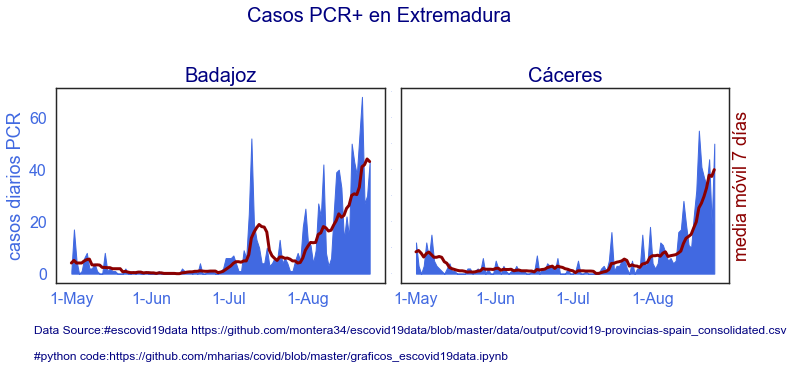

In [14]:
# Preparamos los datos

provincias=['Badajoz','Cáceres']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=5,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(12,5))

f.suptitle('Casos PCR+ en Extremadura',fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,2,1,)
ax1.fill_between(datos['date'].unique(), datos[datos['province'] == 'Badajoz'][clave],color=color_diarios)
ax1.set_ylabel('casos diarios PCR',size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('Badajoz',size=20,color=color_titulos)
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax2.set_ylim(ax1.get_ylim())

ax2.plot(datos['date'].unique(), datos[datos['province'] == 'Badajoz'][clave_avg], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
ax2.set_yticks([])
ax2.grid(axis='both')

ax3 = f.add_subplot(1,2,2)

ax3.fill_between(datos['date'].unique(), datos[datos['province'] == 'Cáceres'][clave],color=color_diarios)

ax3.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax3.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_diarios)
#ax3.set_yticks([])
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax3.set_title('Cáceres',size=20,color=color_titulos)
ax3.set_ylim(ax2.get_ylim())
#ax3.set_yticks(ax1.get_yticks())


ax4 = ax3.twinx()
ax4.grid(axis='both')
ax4.set_ylim(ax3.get_ylim())

ax4.plot(datos['date'].unique(), datos[datos['province'] == 'Cáceres'][clave_avg], lw=3, color=color_avg)
ax4.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax4.xaxis.set_major_formatter(majorFmt)
ax4.set_ylabel('media móvil 7 días',size=18,color=color_avg)
ax4.set_yticks([])

f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
       verticalalignment='center', fontsize=12,color=color_titulos)
f.text(0.1,0.02,'#python code:{}'.format(github_url),
           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+_extremadura.png',dpi=100)  
#plt.show()

<Figure size 432x288 with 0 Axes>

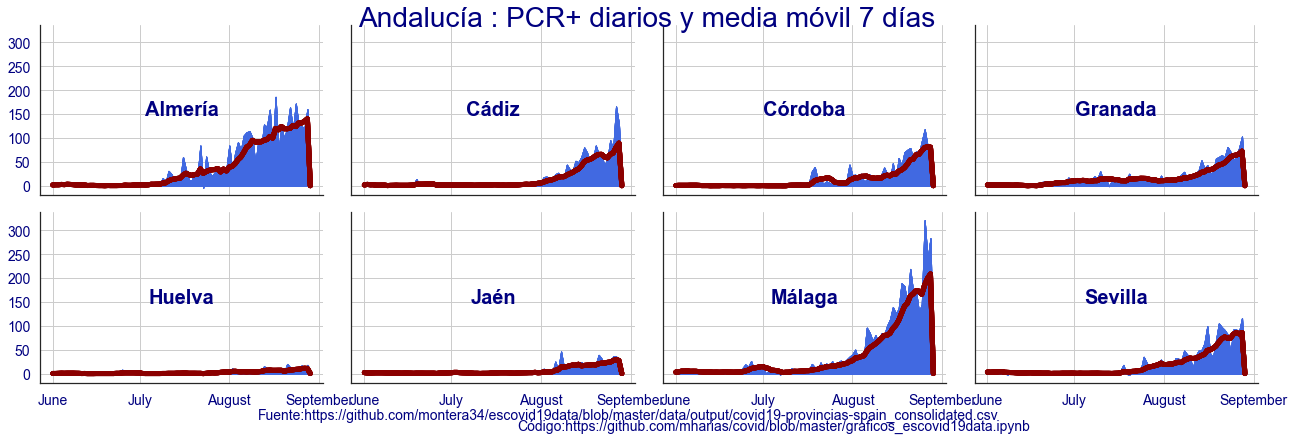

In [15]:
# Preparamos los datos

provincias=['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Andalucía : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.2, 0.035, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.4,0.0,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

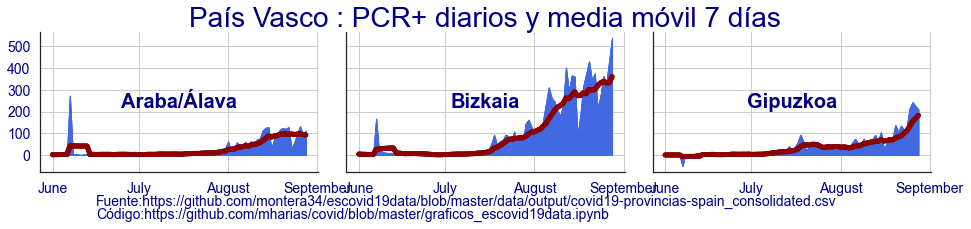

In [16]:
# Preparamos los datos

provincias=['Bizkaia','Araba/Álava','Gipuzkoa']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=3,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('País Vasco : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.1, 0.08, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.1,0.0,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

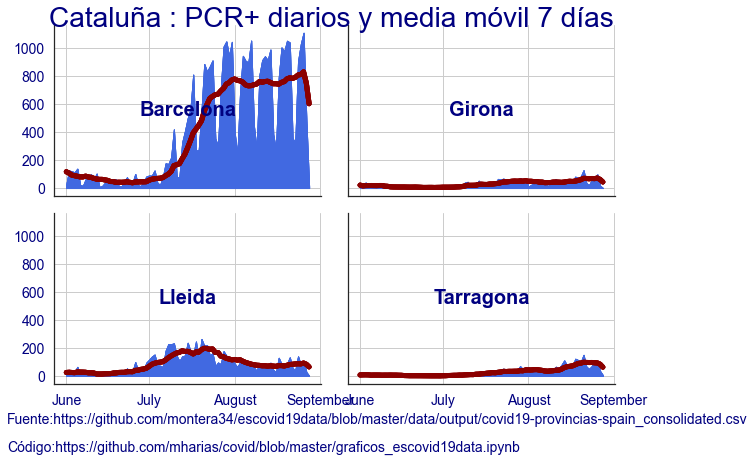

In [17]:
# Preparamos los datos

provincias=['Barcelona','Girona','Lleida','Tarragona']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=2,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Cataluña : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0,-0.05,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

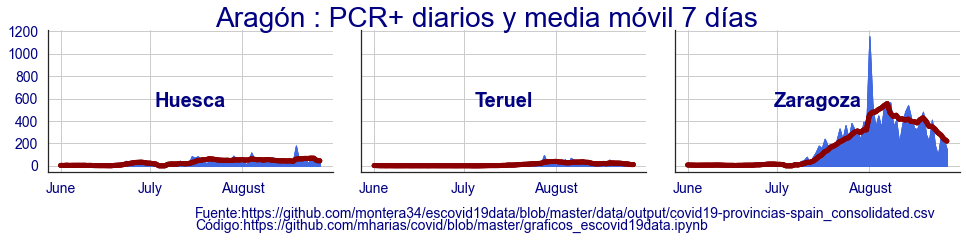

In [18]:
# Preparamos los datos

provincias=['Zaragoza','Teruel','Huesca']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=3,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Aragón : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.2, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.2,-0.05,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

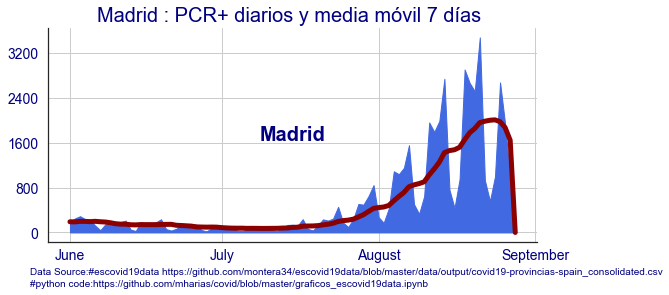

In [19]:
# Preparamos los datos

provincias=['Madrid']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
#plt.figure(figsize=(5,10))
#fig, ax1 = plt.subplots()
# Initialize the FacetGrid object

pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=1,aspect=2, height=4, palette=pal)
# Título
g.fig.suptitle('Madrid : PCR+ diarios y media móvil 7 días',wrap=True,
               fontsize=20,color=color_titulos)
g.fig.text(0.05, 0.05, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]),horizontalalignment='left', 
       fontsize=10,color=color_titulos)
#transform=fig.transFigure
g.fig.text(0.05, 0.01,'#python code:{}'.format(github_url),fontsize=10,
           horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
#g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,pad=0,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax.grid()

#fig.tight_layout()    
g.savefig('graficos/pcr+_madrid.png',dpi=100)  
#plt.show()

<Figure size 432x288 with 0 Axes>

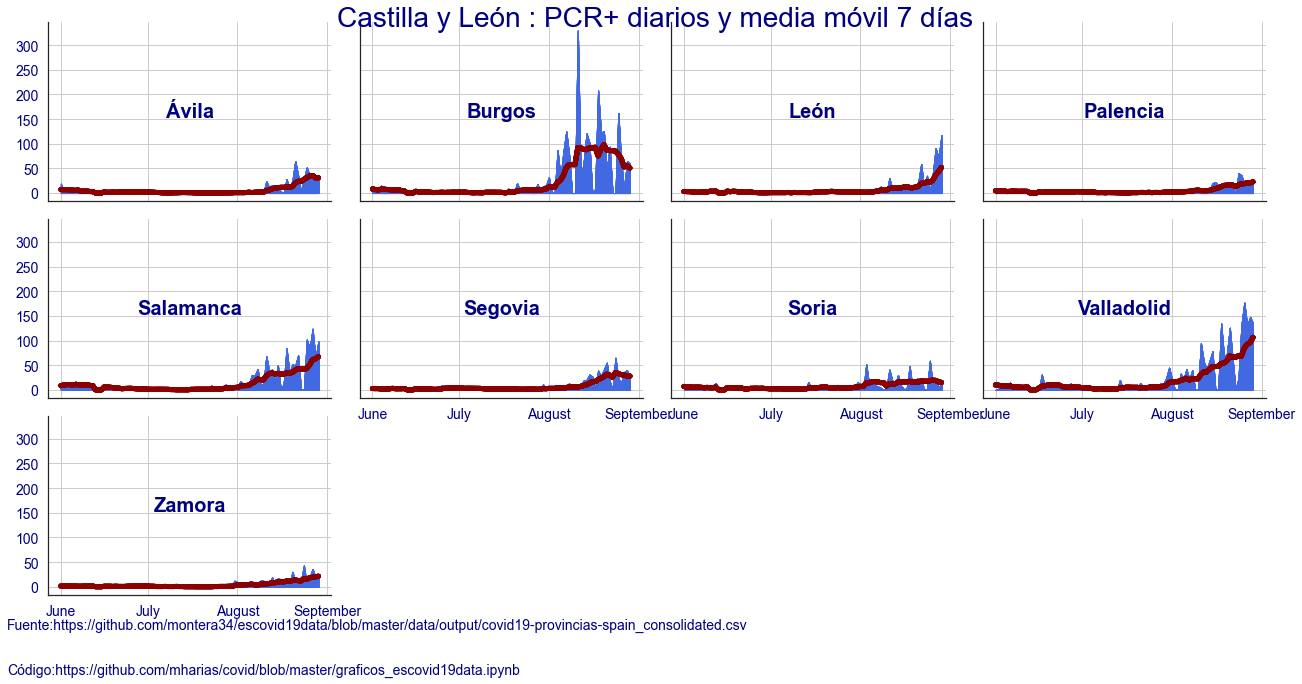

In [20]:
# Preparamos los datos

provincias=['Ávila','Burgos','León','Palencia','Segovia','Soria','Salamanca','Valladolid','Zamora']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Castilla y León : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.0, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.0,-0.05,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

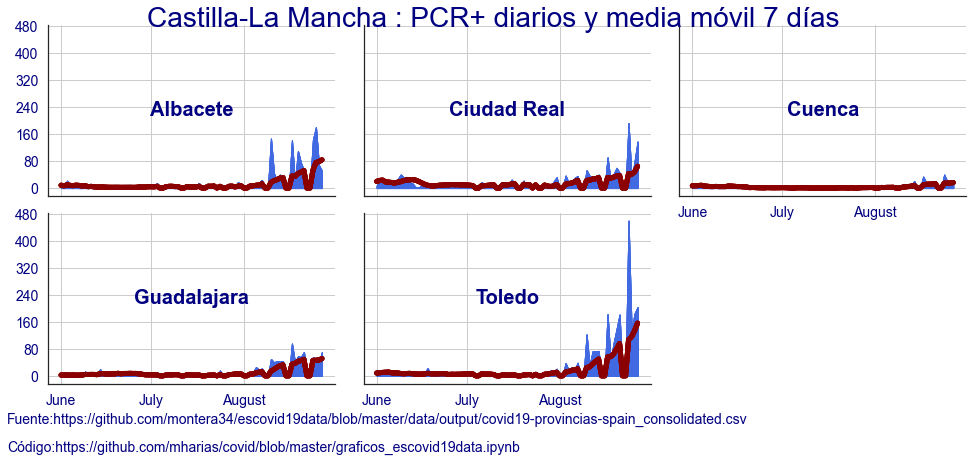

In [21]:
# Preparamos los datos

provincias=['Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=3,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Castilla-La Mancha : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.0, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.0,-0.05,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

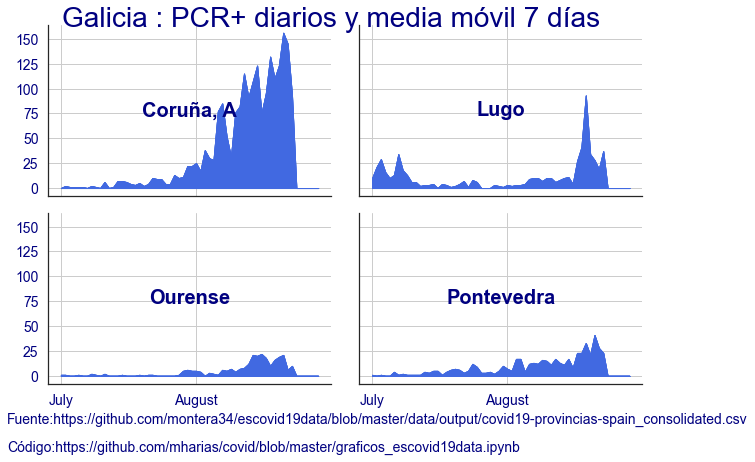

In [22]:
# Preparamos los datos

provincias=['Coruña, A','Lugo','Ourense','Pontevedra']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=1)) & (datos['province'].isin(provincias))]
clave_avg='avg'
clave = 'num_casos'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=2,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Galicia : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.0, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.0,-0.05,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    #g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

# Ídea de @lipido, ratio de tasas...

<Figure size 432x288 with 0 Axes>

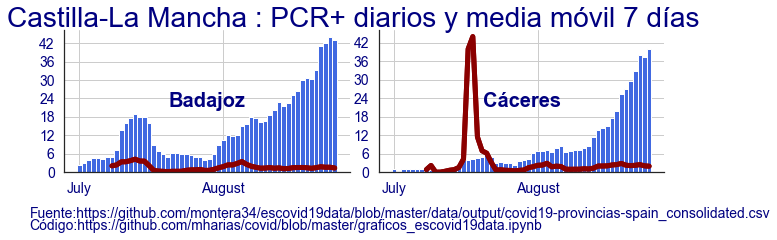

In [114]:
# Preparamos los datos

provincias=['Badajoz','Cáceres']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=1)) & (datos['province'].isin(provincias))]


clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

for provincia in provincias:
    serie=datos.loc[datos['province']==provincia][clave_avg].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio_avg]=serie


# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=2,aspect=1.5, 
                  height=3, palette=pal, sharex=False, sharey=False)
# Título
g.fig.suptitle('Castilla-La Mancha : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.0, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.0,-0.05,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.bar, 'date',clave_avg,color=color_diarios,width=1.0)
    g.map(plt.plot, 'date',clave_ratio_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

In [118]:
for axe in g.axes.flat:
    print (axe.get_ylim())

(0.0, 46.305)
(0.0, 46.2)


In [125]:
datos = df.fillna(0,axis=1)[df['date']>datetime(year=2020,month=6,day=1)]
datos = datos[datos['province'] == 'Badajoz']

In [126]:
datos[clave_ratio_avg]=datos['daily_cases_PCR_avg7'].pct_change(periods=7).add(1)

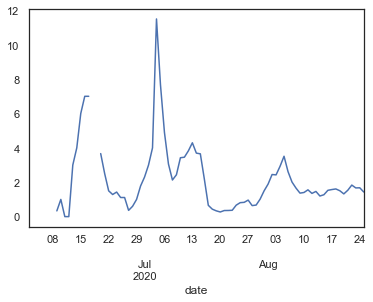

In [127]:
datos.set_index('date')[clave_ratio_avg].plot()

In [89]:
datos[['date','daily_cases_PCR_avg7','daily_cases_PCR',clave_ratio_avg]]

,date,daily_cases_PCR_avg7,daily_cases_PCR,ratio_daily_cases_PCR_avg7
6407,2020-06-02,2.1,2.0,NaN
6459,2020-06-03,1.3,0.0,NaN
6511,2020-06-04,1.7,3.0,NaN
6563,2020-06-05,1.6,1.0,NaN
6615,2020-06-06,1.6,0.0,NaN
6667,2020-06-07,1.7,1.0,NaN
6719,2020-06-08,1.1,1.0,NaN
6771,2020-06-09,1.3,3.0,0.619048
6823,2020-06-10,1.4,1.0,1.076923
6875,2020-06-11,1.1,1.0,0.647059


In [90]:
datos.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'intensive_care', 'deceased',
       'cases_accumulated', 'cases_accumulated_PCR', 'recovered', 'num_casos',
       'num_casos_prueba_pcr', 'num_casos_prueba_test_ac',
       'num_casos_prueba_otras', 'num_casos_prueba_desconocida', 'poblacion',
       'cases_per_cienmil', 'intensive_care_per_1000000',
       'deceassed_per_100000', 'hospitalized_per_100000', 'cases_14days',
       'cases_7days', 'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_inc', 'daily_deaths_avg3',
       'daily_deaths_avg7', 'deaths_last_week', 'source_name', 'source',
       'comments', 'ratio_daily_cases_PCR_avg7'],
      dtype='object')

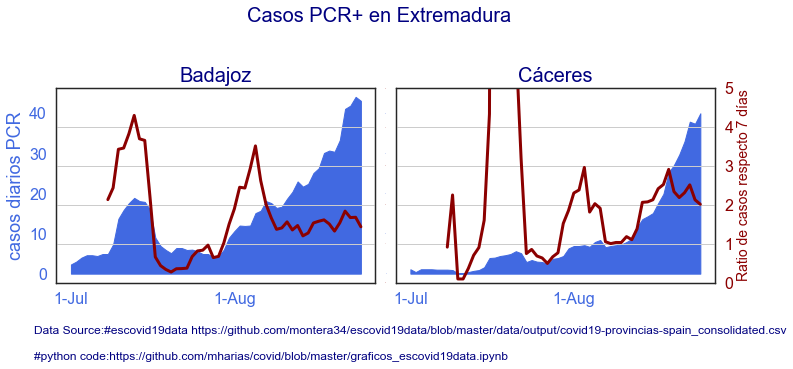

In [156]:
# Preparamos los datos

provincias=['Badajoz','Cáceres']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=1)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

for provincia in provincias:
    serie=datos.loc[datos['province']==provincia][clave_avg].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio_avg]=serie


# preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(12,5))

f.suptitle('Casos PCR+ en Extremadura',fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,2,1,)
ax1.fill_between(datos['date'].unique(), datos[datos['province'] == 'Badajoz'][clave_avg],color=color_diarios)
ax1.set_ylabel('casos diarios PCR',size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('Badajoz',size=20,color=color_titulos)
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax2.set_ylim(0,5)

ax2.plot(datos['date'].unique(), datos[datos['province'] == 'Badajoz'][clave_ratio_avg], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
#ax2.set_yticks([])
ax2.grid(True,axis='y')
ax2.yaxis.set_tick_params(labelsize=0,labelcolor=color_avg,width=0)


ax3 = f.add_subplot(1,2,2)

ax3.fill_between(datos['date'].unique(), datos[datos['province'] == 'Cáceres'][clave_avg],color=color_diarios)

ax3.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax3.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_diarios)
#ax3.set_yticks([])
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax3.set_title('Cáceres',size=20,color=color_titulos)
ax3.set_ylim(ax1.get_ylim())
#ax3.set_yticks(ax1.get_yticks())


ax4 = ax3.twinx()
ax4.grid(True)
ax4.set_ylim(ax2.get_ylim())

ax4.plot(datos['date'].unique(), datos[datos['province'] == 'Cáceres'][clave_ratio_avg], lw=3, color=color_avg)
ax4.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax4.xaxis.set_major_formatter(majorFmt)
ax4.set_ylabel('Ratio de casos respecto 7 días',size=14,color=color_avg)
#ax4.set_yticks([])
ax4.yaxis.set_tick_params(labelsize=16,labelcolor=color_avg,width=0)
f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
       verticalalignment='center', fontsize=12,color=color_titulos)
f.text(0.1,0.02,'#python code:{}'.format(github_url),
           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+_extremadura.png',dpi=100)  
#plt.show()

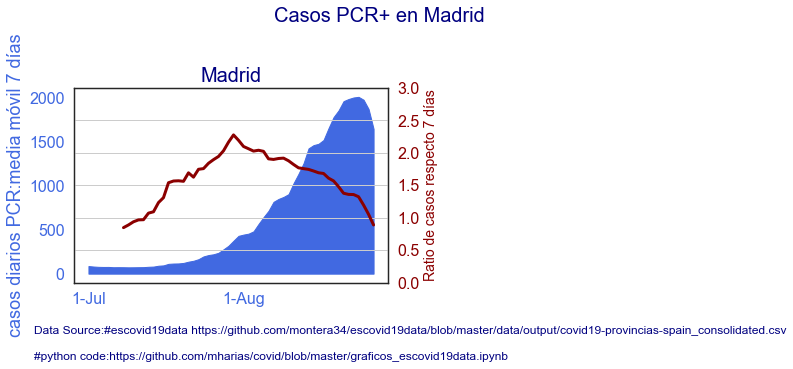

In [172]:
# Preparamos los datos

provincias=['Madrid']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=1)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

for provincia in provincias:
    serie=datos.loc[datos['province']==provincia][clave_avg].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio_avg]=serie


# preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(12,5))

f.suptitle('Casos PCR+ en Madrid',fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,2,1,)
ax1.fill_between(datos['date'].unique()[:-1], datos[clave_avg][:-1],color=color_diarios)
ax1.set_ylabel('casos diarios PCR:media móvil 7 días',size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('Madrid',size=20,color=color_titulos)
ax1.set_xlim()
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax2.set_ylim(0,3)

ax2.plot(datos['date'].unique()[:-1], datos[clave_ratio_avg][:-1], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
#ax2.set_yticks([])
ax2.grid(True,axis='y')
ax2.yaxis.set_tick_params(labelsize=0,labelcolor=color_avg,width=0)
ax2.set_ylabel('Ratio de casos respecto 7 días',size=14,color=color_avg)
#ax4.set_yticks([])
ax2.yaxis.set_tick_params(labelsize=16,labelcolor=color_avg,width=0)

f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
       verticalalignment='center', fontsize=12,color=color_titulos)
f.text(0.1,0.02,'#python code:{}'.format(github_url),
           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+_extremadura.png',dpi=100)  
#plt.show()

In [162]:
datos.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'intensive_care', 'deceased',
       'cases_accumulated', 'cases_accumulated_PCR', 'recovered', 'num_casos',
       'num_casos_prueba_pcr', 'num_casos_prueba_test_ac',
       'num_casos_prueba_otras', 'num_casos_prueba_desconocida', 'poblacion',
       'cases_per_cienmil', 'intensive_care_per_1000000',
       'deceassed_per_100000', 'hospitalized_per_100000', 'cases_14days',
       'cases_7days', 'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_inc', 'daily_deaths_avg3',
       'daily_deaths_avg7', 'deaths_last_week', 'source_name', 'source',
       'comments', 'ratio_daily_cases_PCR_avg7'],
      dtype='object')

In [165]:
datos[['date','daily_cases_PCR','daily_cases_PCR_avg7','ratio_daily_cases_PCR_avg7']]

,date,daily_cases_PCR,daily_cases_PCR_avg7,ratio_daily_cases_PCR_avg7
7934,2020-07-01,74.0,86.4,NaN
7986,2020-07-02,103.0,81.0,NaN
8038,2020-07-03,112.0,77.3,NaN
8090,2020-07-04,34.0,76.0,NaN
8142,2020-07-05,23.0,76.4,NaN
8194,2020-07-06,52.0,73.0,NaN
8246,2020-07-07,118.0,73.7,NaN
8298,2020-07-08,70.0,73.1,0.846065
8350,2020-07-09,94.0,71.9,0.887654
8402,2020-07-10,116.0,72.4,0.936611
